                                    **Project : FBI Dataset**
                                    

## Questions :
1   What is the state where is so much selling Guns?

2   is number of population and poverty the reason for more guns selling ?

3   is the more Veterans in state , the more selling guns ? 

## Data Wrangling :


In [85]:
# cell to set up import statements for all of the packages that you
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
# Load your data and print out a few lines. Perform operations to inspect data

gun_data=pd.read_csv('gun_data.csv')
Census_Data=pd.read_csv('U.S. Census Data.csv')

In [87]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [88]:
Census_Data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [89]:
# i will begin with gun_data qnd fix all issues anf try to create the best version of it for EDA
# check the data type of variables in the gun dataset

gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [90]:
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

## Data Cleaning 


In [91]:
## i will fill all missing data with 0 cause there a multilinear relationship between all variables and totals
#the sum of all variables is totals#

In [92]:
gun_data= gun_data.fillna(0)


In [93]:
gun_data.isnull().sum()


month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [94]:
# let's fix the column date of gun_data
gun_data['year']=gun_data['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun_data['month']=gun_data['month'].apply(lambda x: x.split("-")[1]).astype(int)


In [95]:
# i will drop useless columns and groupby the state and sum all numbers of selling guns
new_gun_data = gun_data.drop(['month', 'permit' , 'permit_recheck','admin','totals','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other','returned_other'],axis = 1)


In [96]:
new_gun_data.head()

,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,year
0,Alabama,5734.0,6320.0,221.0,317,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,2017
1,Alaska,2320.0,2930.0,219.0,160,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,17.0,24.0,1.0,2017
2,Arizona,11063.0,7946.0,920.0,631,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,38.0,12.0,2.0,2017
3,Arkansas,4347.0,6063.0,165.0,366,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,2017
4,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017


In [97]:
new_gun_data = new_gun_data.groupby(['state','year']).sum()
new_gun_data = new_gun_data.sum(axis = 1)
new_gun_data = new_gun_data.reset_index()


In [98]:
new_gun_data = new_gun_data.set_axis(["state", "year",'Totals'], axis=1)


In [99]:
## now our gun_data is ready for analysis with Census data we can see why each state had to buy more guns more then others
new_gun_data.head(30)

,state,year,Totals
0,Alabama,1998,36568.0
1,Alabama,1999,246756.0
2,Alabama,2000,221899.0
3,Alabama,2001,230187.0
4,Alabama,2002,221008.0
5,Alabama,2003,225479.0
6,Alabama,2004,229997.0
7,Alabama,2005,235873.0
8,Alabama,2006,243176.0
9,Alabama,2007,245355.0


In [100]:
## now let's fix Census_data 
Census_Data.isnull().sum()

Census_Data =Census_Data.drop('Fact Note',axis=1)

Census_Data = Census_Data.dropna()

In [101]:
## as we have state as main variable for both data sets we need to converts columns of census data into rows 

In [102]:
Census_Data.set_index('Fact',inplace=True)
Census_Data = Census_Data.T

In [103]:
Census_Data.reset_index(inplace = True)


In [104]:
Census_Data.rename(columns={'index':'state'},inplace = True)


In [105]:
Census_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   state                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [106]:
# let is check what is the best state in selling guns between 2010 and 2017 
new_gun_data = new_gun_data.loc[(new_gun_data['year'] >= 2010)]


In [107]:
gun_data_10_17 = new_gun_data.drop('year',axis = 1)

In [108]:
gun_data_10_17 = gun_data_10_17.groupby('state').sum({'Totals: sum'})

In [109]:
gun_data_10_17.reset_index(inplace= True)



## Exploratory Data Analysis

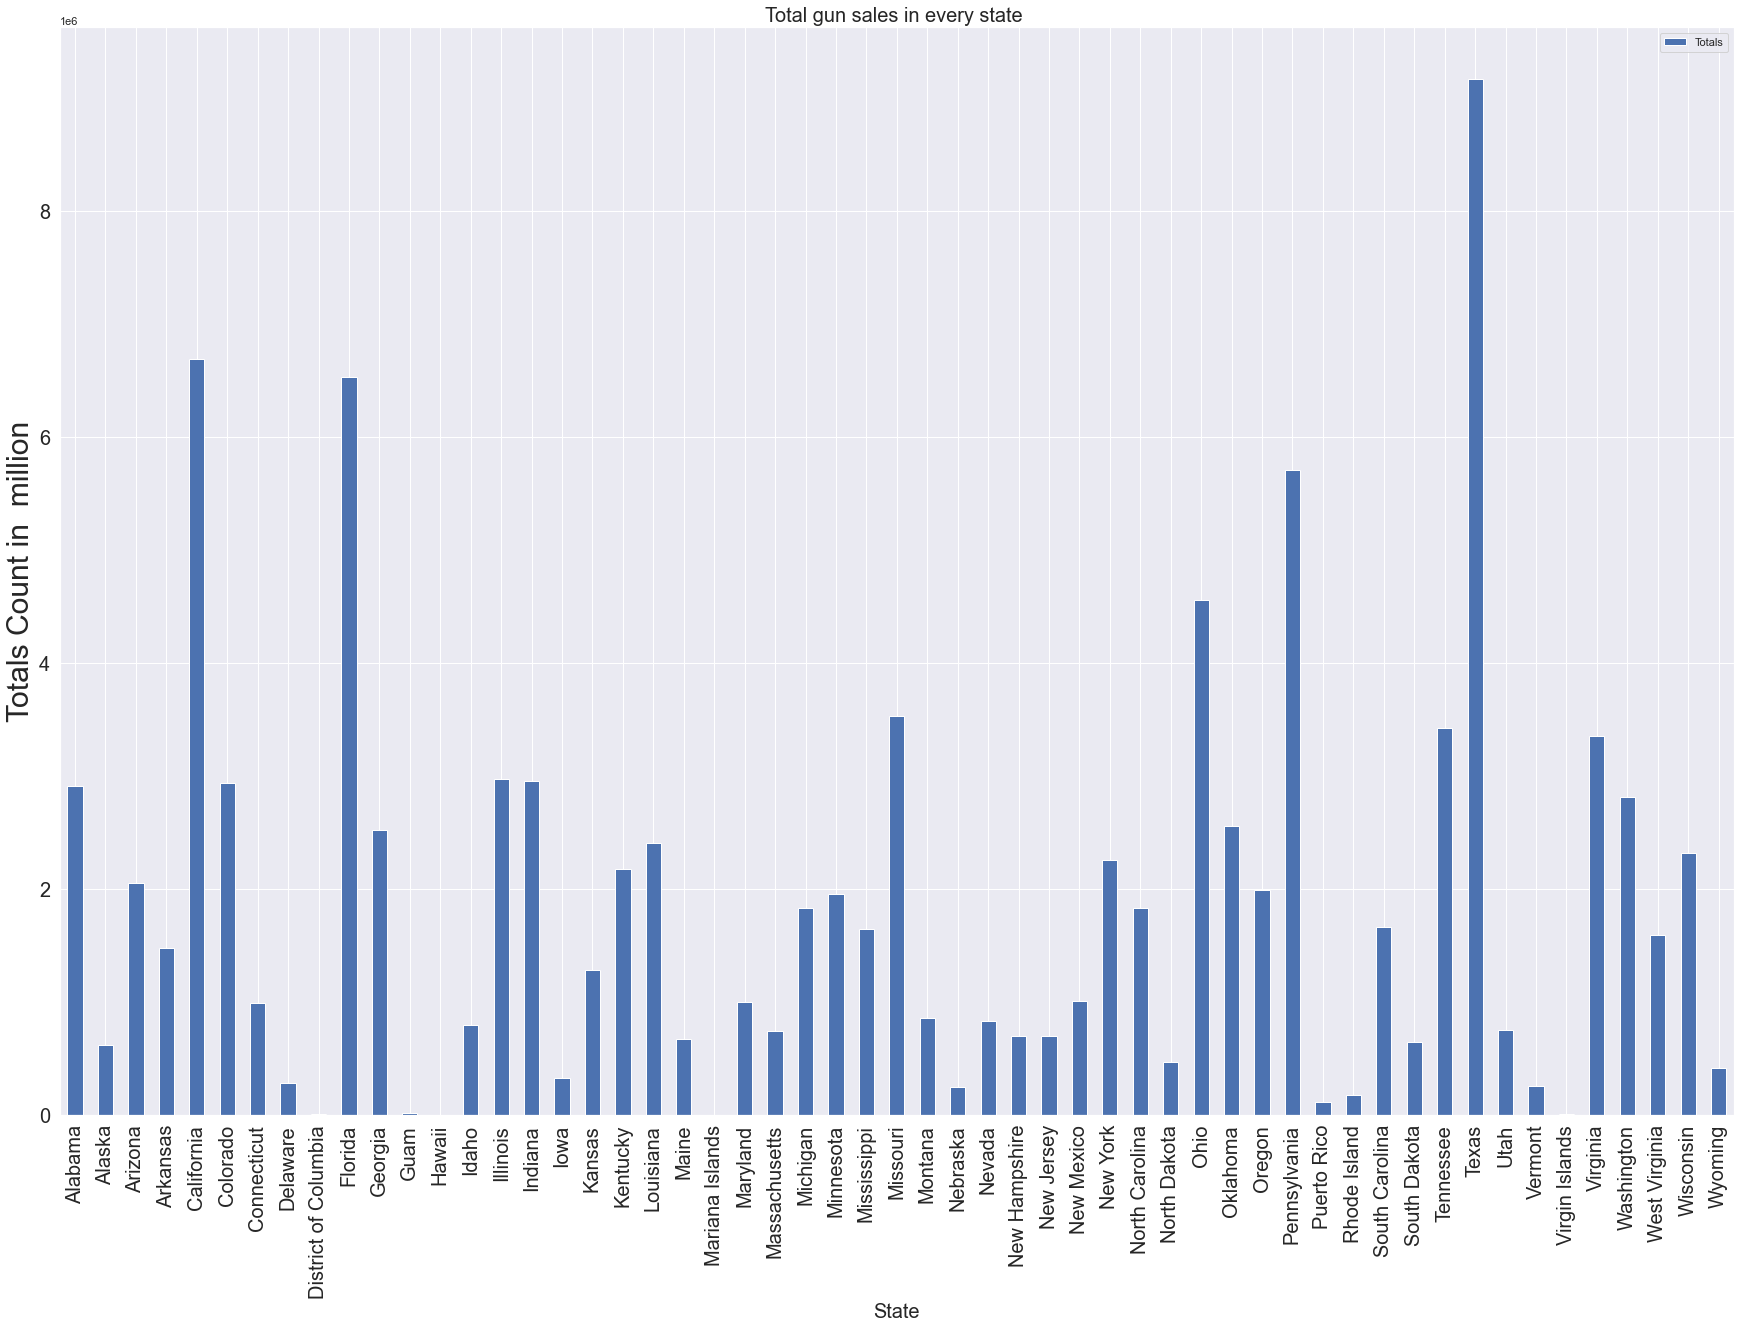

In [110]:
## Question 1 : What is the state where is so much selling Guns?

sns.set()
gun_data_10_17.plot(x='state', y=['Totals'], kind='bar', figsize=(30, 20))
plt.xlabel("State", fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.ylabel("Totals Count in  million", fontsize=30)
plt.title("Total gun sales in every state ", fontsize=20)
plt.savefig('Comparison between Population per square mile and gun sales.png', dpi=300, bbox_inches='tight')



In [111]:
## As we can see Texas had the most Guns selling now we will find what is the most reason behind this guns selling 
## we will check 'Population estimates, July 1, 2016,  (V2016)' and 'Persons in poverty, percent' and 'Veterans, 2011-2015'


In [112]:
new_Census_Data =  Census_Data[['state','Population estimates, July 1, 2016,  (V2016)','Veterans, 2011-2015','Persons in poverty, percent']]   


In [113]:
new_Census_Data.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Veterans, 2011-2015","Persons in poverty, percent"
0,Alabama,"4,863,300","363,170",17.10%
1,Alaska,"741,894","69,323",9.90%
2,Arizona,"6,931,071","505,794",16.40%
3,Arkansas,"2,988,248","220,953",17.20%
4,California,"39,250,017","1,777,410",14.30%


In [114]:
# we will create a function for fixing all issues in columns of our data 
def cols(column):    
    new_Census_Data[column].replace(regex=True, inplace=True, to_replace = r'[^\d.-]', value = r'')
    new_Census_Data[column] = pd.to_numeric(new_Census_Data[column], downcast='float')
    return new_Census_Data[column]

In [115]:
# now we need to fix the form of columns in our data 

cols('Population estimates, July 1, 2016,  (V2016)')
cols('Veterans, 2011-2015')
cols('Persons in poverty, percent')


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_19892\3926495114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Census_Data[column].replace(regex=True, inplace=True, to_replace = r'[^\d.-]', value = r'')
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_19892\3926495114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Census_Data[column] = pd.to_numeric(new_Census_Data[column], downcast='float')


0     17.100000
1      9.900000
2     16.400000
3     17.200001
4     14.300000
5     11.000000
6      9.800000
7     11.700000
8     14.700000
9     16.000000
10     9.300000
11    14.400000
12    13.000000
13    14.100000
14    11.800000
15    12.100000
16    18.500000
17    20.200001
18    12.500000
19     9.700000
20    10.400000
21    15.000000
22     9.900000
23    20.799999
24    14.000000
25    13.300000
26    11.400000
27    13.800000
28     7.300000
29    10.400000
30     0.198000
31     0.147000
32     0.154000
33     0.107000
34     0.146000
35     0.163000
36     0.133000
37     0.129000
38     0.128000
39     0.153000
40     0.133000
41     0.158000
42    15.600000
43    10.200000
44    11.900000
45    11.000000
46    11.300000
47    17.900000
48    11.800000
49    11.300000
Name: Persons in poverty, percent, dtype: float32

In [116]:
new_Census_Data['Persons in poverty, percent'] = new_Census_Data['Persons in poverty, percent'].apply(lambda x: x/100 if x > 1 else x )


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_19892\2076423149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Census_Data['Persons in poverty, percent'] = new_Census_Data['Persons in poverty, percent'].apply(lambda x: x/100 if x > 1 else x )


In [117]:
new_Census_Data.head(10)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Veterans, 2011-2015","Persons in poverty, percent"
0,Alabama,4863300.0,363170.0,0.171
1,Alaska,741894.0,69323.0,0.099
2,Arizona,6931071.0,505794.0,0.164
3,Arkansas,2988248.0,220953.0,0.172
4,California,39250016.0,1777410.0,0.143
5,Colorado,5540545.0,391725.0,0.110
6,Connecticut,3576452.0,199331.0,0.098
7,Delaware,952065.0,71213.0,0.117
8,Florida,20612440.0,1507738.0,0.147
9,Georgia,10310371.0,670617.0,0.160


In [118]:
new_Census_Data['Persons in poverty'] = new_Census_Data['Population estimates, July 1, 2016,  (V2016)']*new_Census_Data['Persons in poverty, percent']

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_19892\3323529342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Census_Data['Persons in poverty'] = new_Census_Data['Population estimates, July 1, 2016,  (V2016)']*new_Census_Data['Persons in poverty, percent']


In [119]:
## we will merge our dataset new_Census_Data and gun_data_10_17 and try to find most reason for buying more guns

In [120]:
df = pd.merge(new_Census_Data, gun_data_10_17, on='state')


In [121]:
df.head()


,state,"Population estimates, July 1, 2016, (V2016)","Veterans, 2011-2015","Persons in poverty, percent",Persons in poverty,Totals
0,Alabama,4863300.0,363170.0,0.171,8.316243e+05,2906968.0
1,Alaska,741894.0,69323.0,0.099,7.344750e+04,619270.0
2,Arizona,6931071.0,505794.0,0.164,1.136696e+06,2046784.0
3,Arkansas,2988248.0,220953.0,0.172,5.139787e+05,1473961.0
4,California,39250016.0,1777410.0,0.143,5.612752e+06,6690744.0


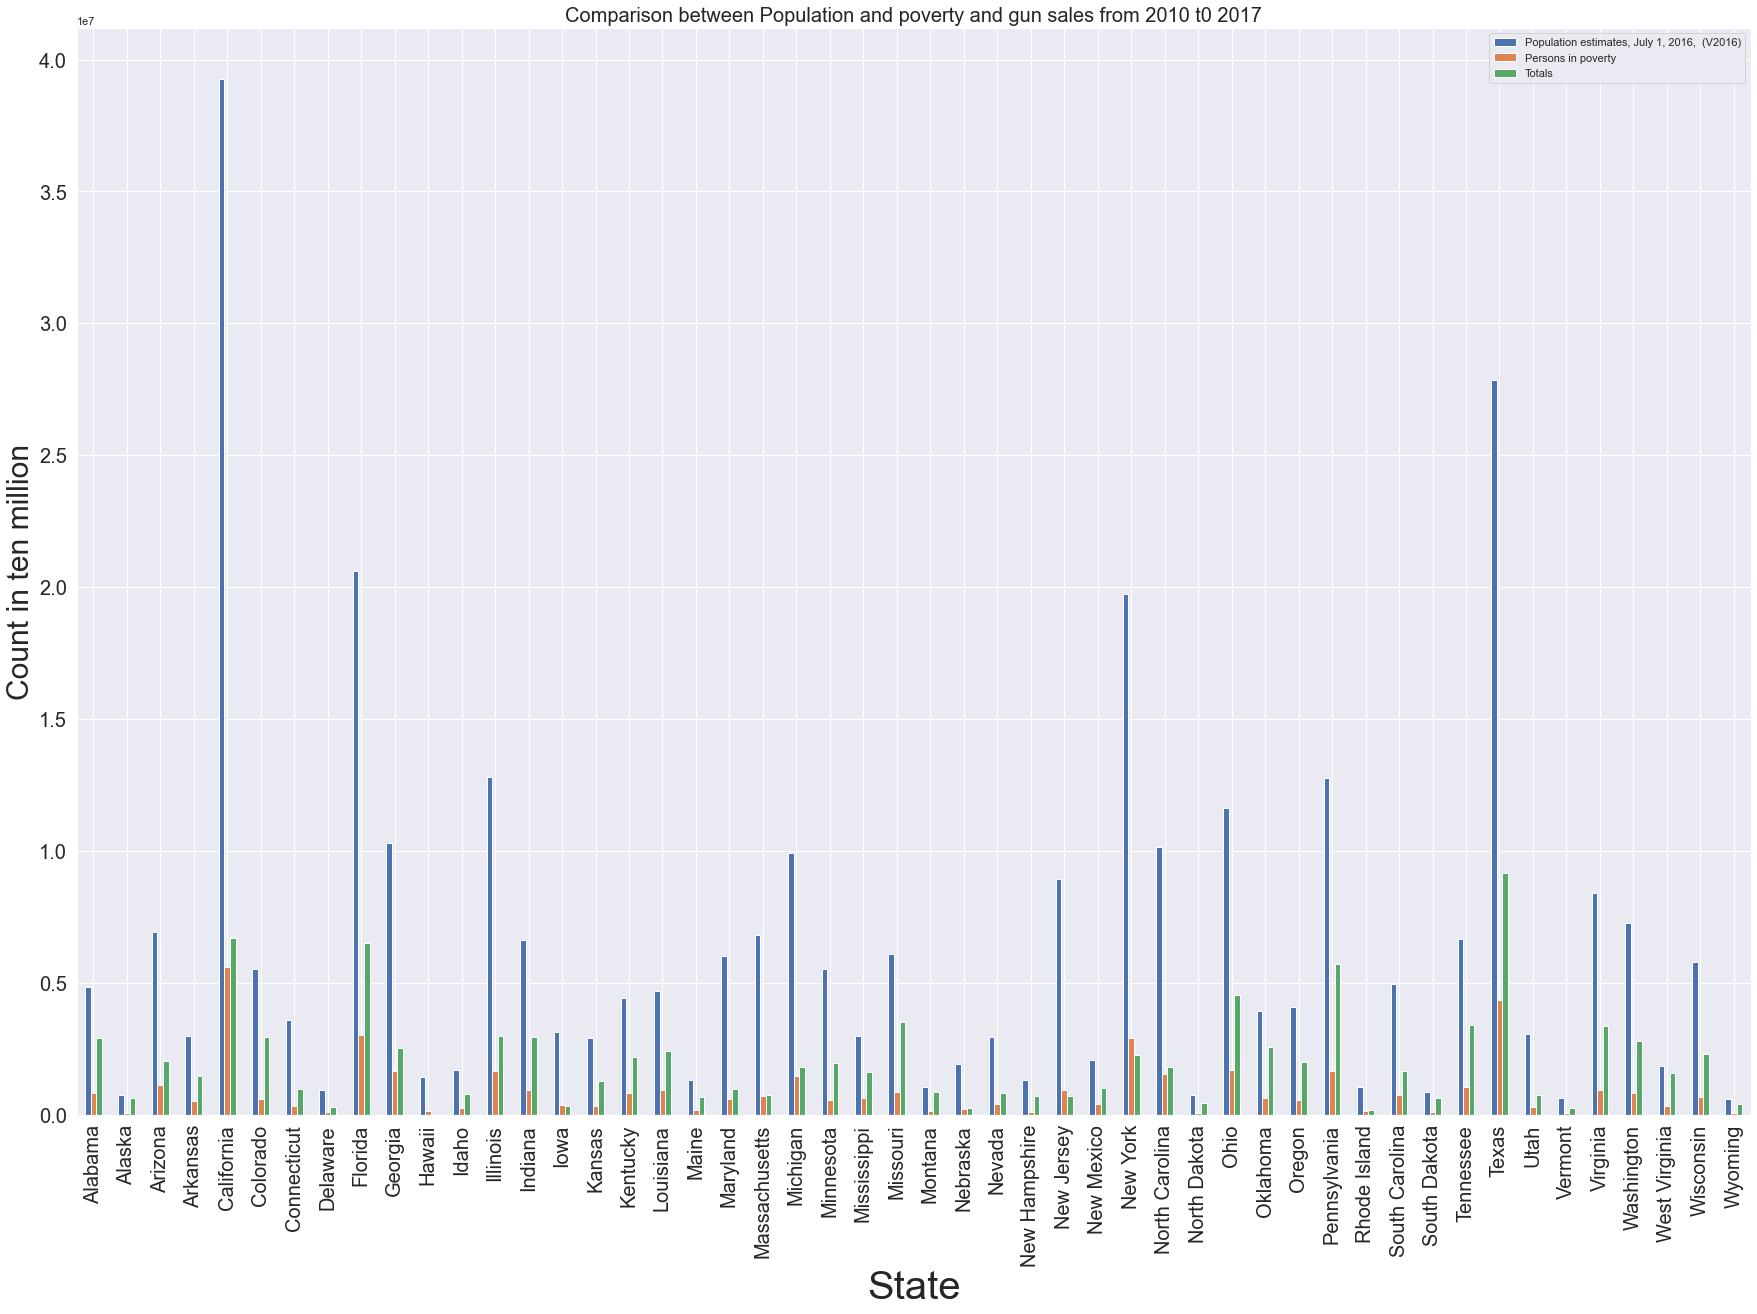

In [122]:
## Question 2 : is number of population and poverty the reason for more guns selling ?
sns.set()
df.plot(x='state', y=['Population estimates, July 1, 2016,  (V2016)','Persons in poverty','Totals'], kind='bar', figsize=(30, 20))
plt.xlabel("State", fontsize=40)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.ylabel('Count in ten million',fontsize=30)
plt.title("Comparison between Population and poverty and gun sales from 2010 t0 2017", fontsize=20)
plt.savefig('Comparison between Population and poverty and gun sales from 2010 t0 2017.png', dpi=300, bbox_inches='tight')


As we can see poverty and Population have causation for buying guns as in California has top population number 
and texas is secand rank of population number but in buying guns texas is number one that is due to poverty in texas ,
cause the percent of poverty in texas is much higher then california

In [123]:
new_gun_data = new_gun_data[(new_gun_data['year'] > 2010) & (new_gun_data['year'] <= 2015) ]

gun_data_11_15 = new_gun_data.drop('year',axis = 1)
gun_data_11_15 = gun_data_10_17.groupby('state').sum({'Totals: sum'})
gun_data_11_15.reset_index(inplace= True)

In [124]:
gun_data_11_15.head()

,state,Totals
0,Alabama,2906968.0
1,Alaska,619270.0
2,Arizona,2046784.0
3,Arkansas,1473961.0
4,California,6690744.0


In [125]:
df_1 = pd.merge(new_Census_Data, gun_data_11_15, on='state')


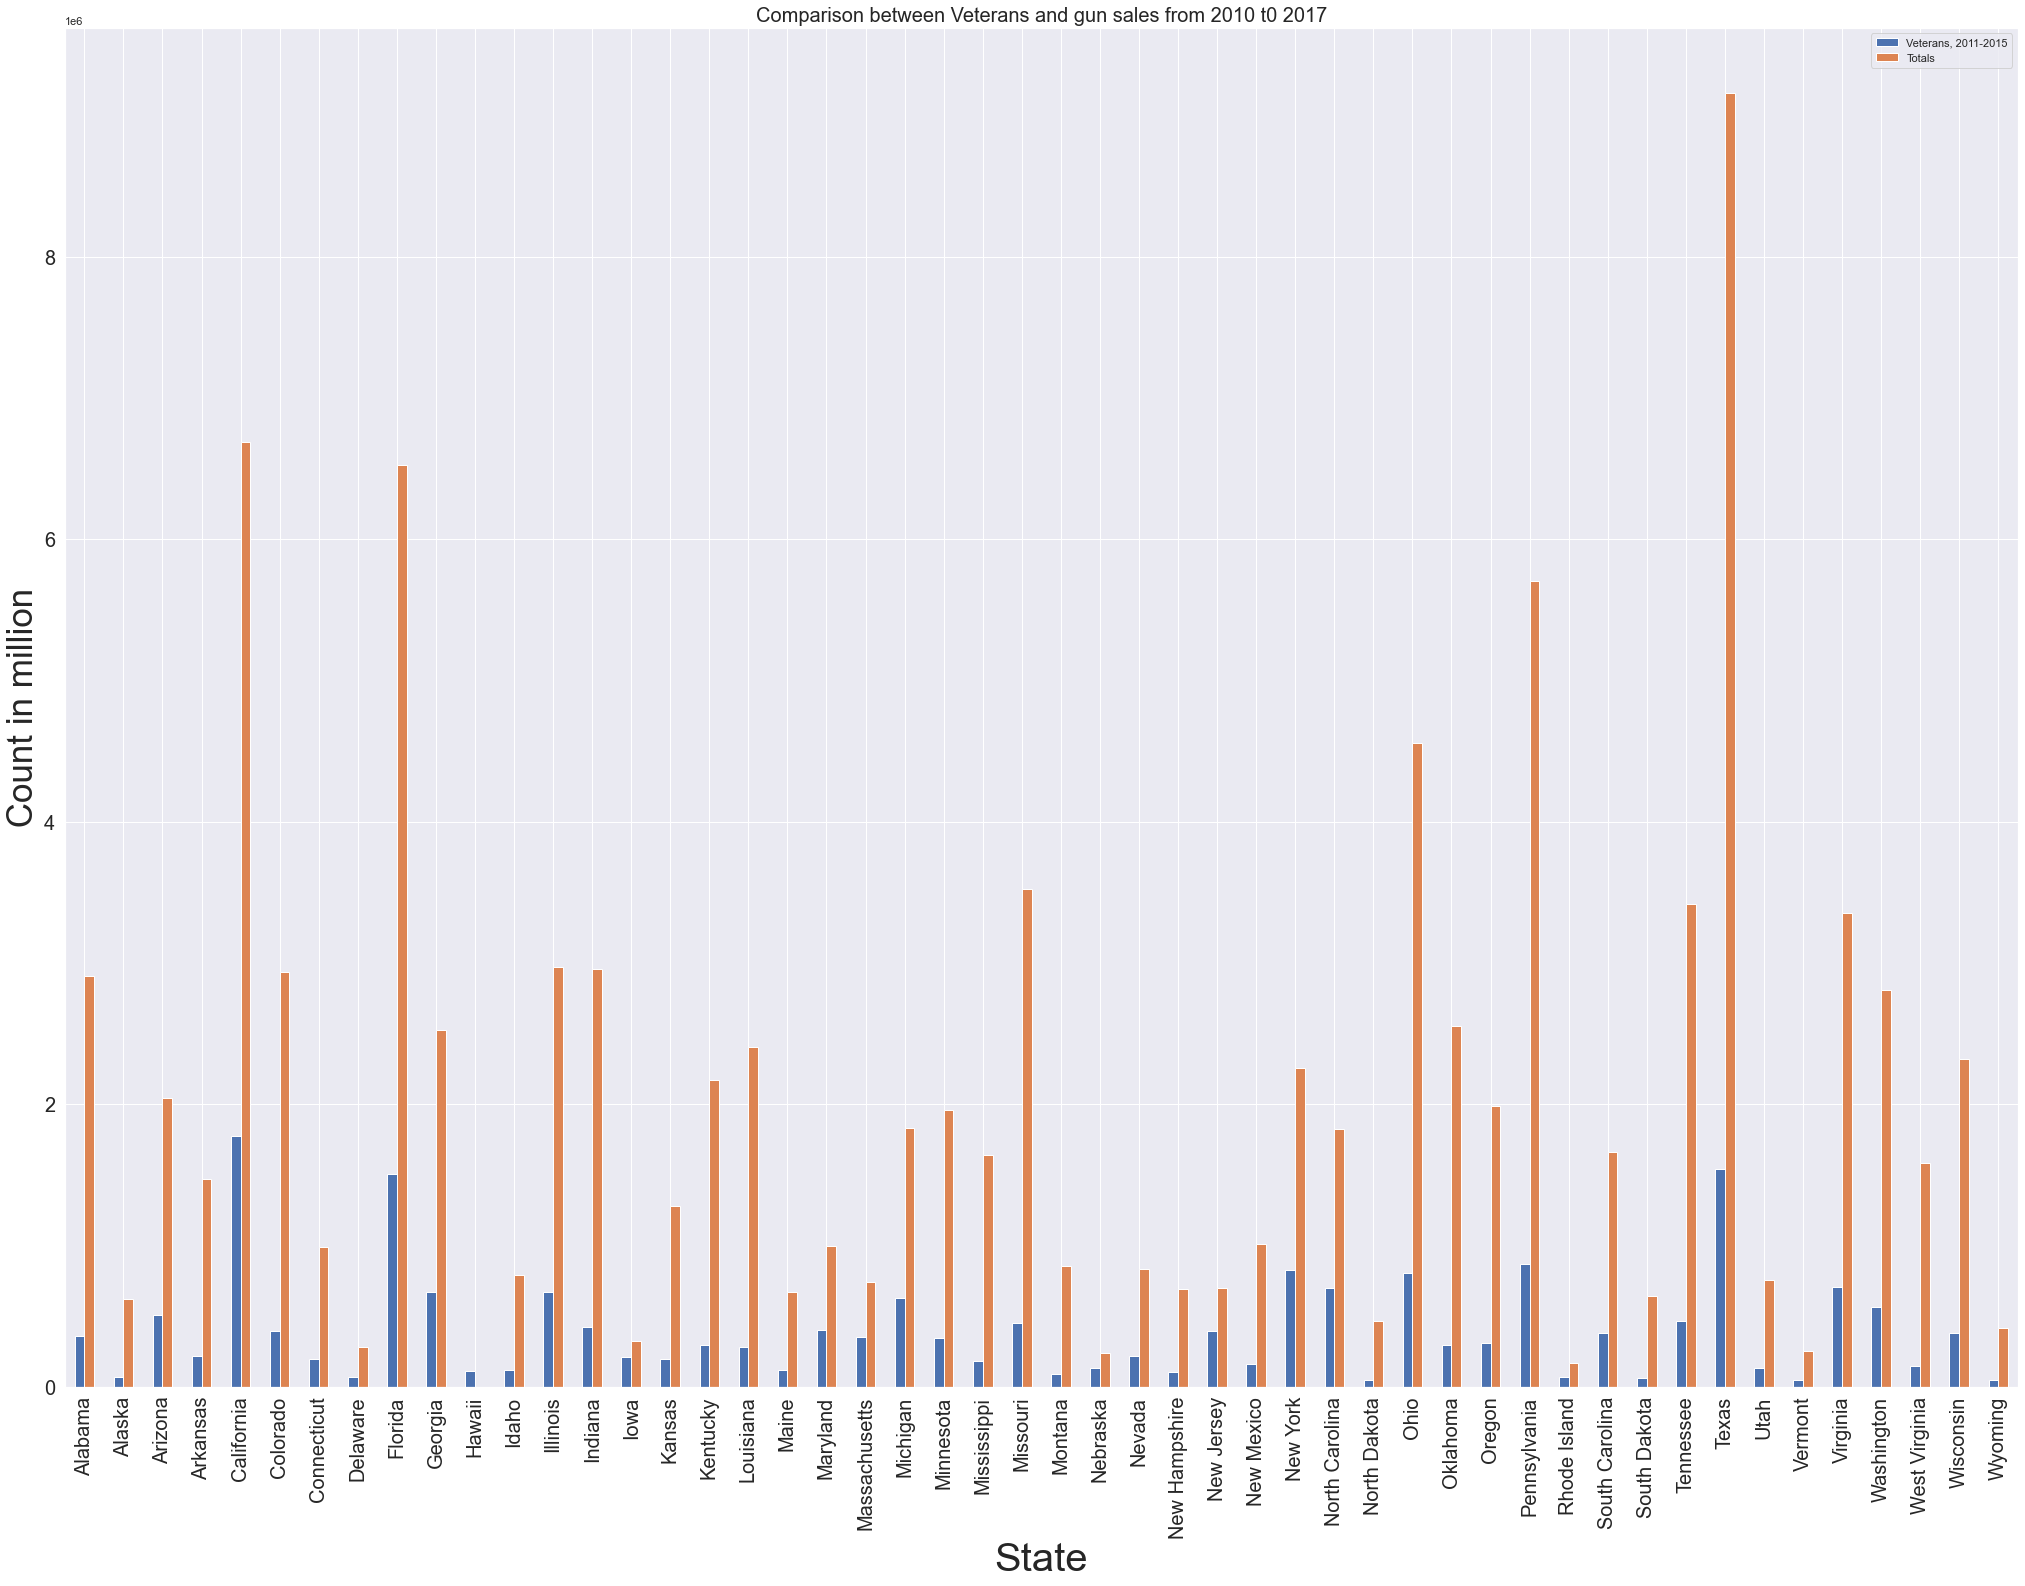

In [126]:
## Question 3 :  is the more Veterans in state , the more selling guns ? 
sns.set()
df_1.plot(x='state', y=['Veterans, 2011-2015','Totals'], kind='bar', figsize=(35, 25))
plt.xlabel("State", fontsize=40)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.ylabel(' Count in million ',fontsize=35)
plt.title("Comparison between Veterans and gun sales from 2010 t0 2017", fontsize=20)
plt.savefig('Comparison between Veterans and gun sales from 2010 t0 2017.png', dpi=300, bbox_inches='tight')




As we can see all states that have more Veterans had more gun sellings but it still is not the perfect reason for buying Guns


## Conclusion

The gun and census data shared similar variables such as states and date. that make them good for merging and
studing both at the same time, the gun_data had missing value and has as multilinear relation with all variables and total variable and census data has a powerfull parameters to know why there is such numbers of selling guns in each state,
Comparing and contrasting both data by countries and date would give the idea about the gun registration per capita
after analysing both data its obvious that there is some parameters in census data that is responsible for buying guns 
i tried to see if poverty and population has any impact in buying guns ,but it was not a powerfull impact
and also for Veterans parameters its not a powerfull parameters that control buying guns 

## Limitation 
When it comes to the limitation,there are missing values for U.S states such as Puerto Rico, and others in census_data. 
It would be appropriate to include them in census data to calculate and check the behaviour of state.
and if there is any other data for knowing the use of all this guns is gonna be very help full for understanding the Sells guns in all state